<h1>YoloV3</h1>

In [1]:
# importing
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# paths
cfg_path = "./laborator_yolo-20250114/yolov3.cfg"
weights_path = "./laborator_yolo-20250114/yolov3.weights"
names_path = "./laborator_yolo-20250114/coco.names"
image_paths = ["./laborator_yolo-20250114/imagine01.jpg", "./laborator_yolo-20250114/imagine02.jpg"]

In [12]:
# read classes
with open(names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['persoana', 'bicicleta', 'masina', 'motoreta', 'aeroplan', 'autobuz', 'tren', 'tir', 'barca', 'semafor', 'hidrant', 'stop (semn)', 'parcometru', 'banca', 'pasare', 'pisica', 'caine', 'cal', 'oaie', 'cal', 'elefant', 'urs', 'zebra', 'girafa', 'rucsac', 'umbrela', 'geanta de mana', 'cravata', 'valiza', 'frisbee', 'schiuri', 'snowboard', 'minge de sport', 'zmeu', 'bata de baseball', 'manusa de baseball', 'skateboard', 'placa de surfing', 'racheta de tenis', 'sticla', 'pahar de vin', 'ceasca', 'furculita', 'cutit', 'lingurita', 'castron', 'banana', 'mar', 'sandwich', 'portocale', 'brocoli', 'morcov', 'hot dog', 'pizza', 'gogoasa', 'tort', 'scaun', 'canapea', 'planta in ghiveci', 'pat', 'masa', 'toaleta', 'tv (monitor)', 'laptop', 'mouse', 'telecomanda', 'tastatura', 'telefon mobil', 'cuptor cu microunde', 'cuptor', 'prajitor de paine', 'chiuveta', 'frigider', 'carte', 'ceas', 'vaza', 'foarfece', 'ursulet', 'uscator de par', 'periuta de dinti']


In [17]:
# load yolo weights and arhitecture
net = cv2.dnn.readNet(weights_path, cfg_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [18]:
# function for object detection and bounding box
def detect_objects(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)


    class_ids, confidences, boxes = [], [], []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = f"{classes[class_ids[i]]} {int(confidences[i] * 100)}%"
            color = (0, 255, 0) 
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

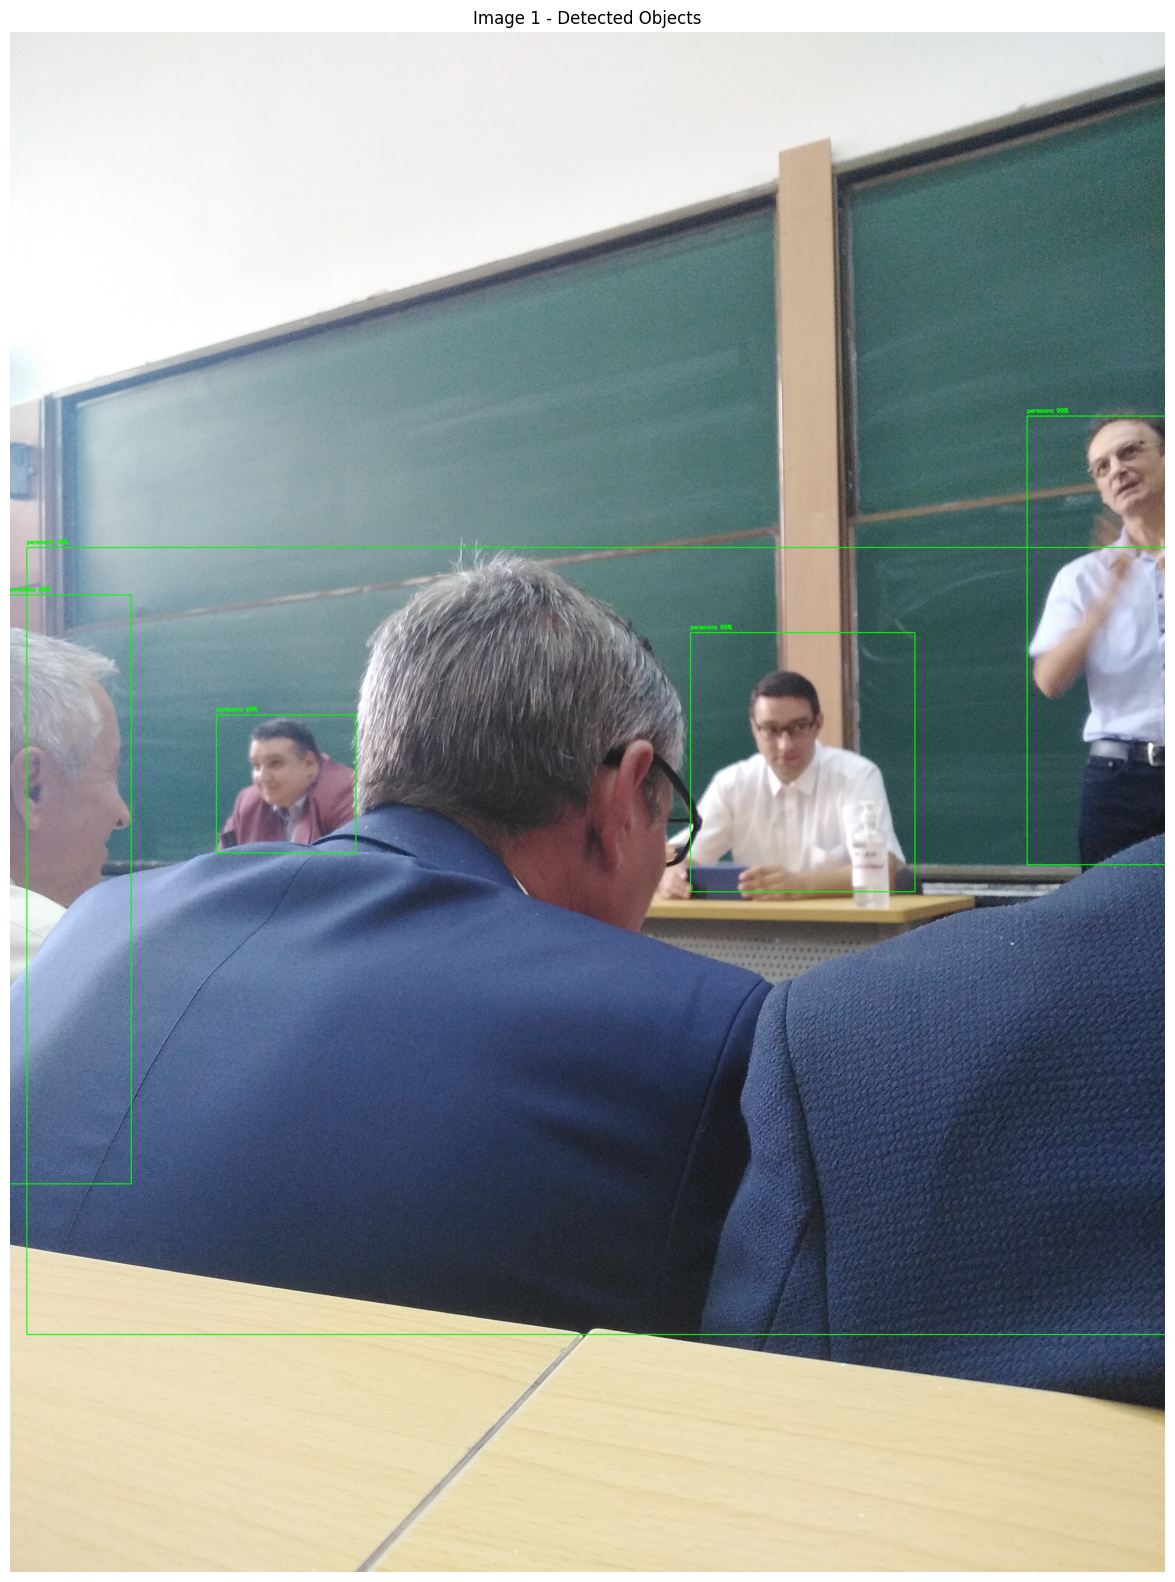

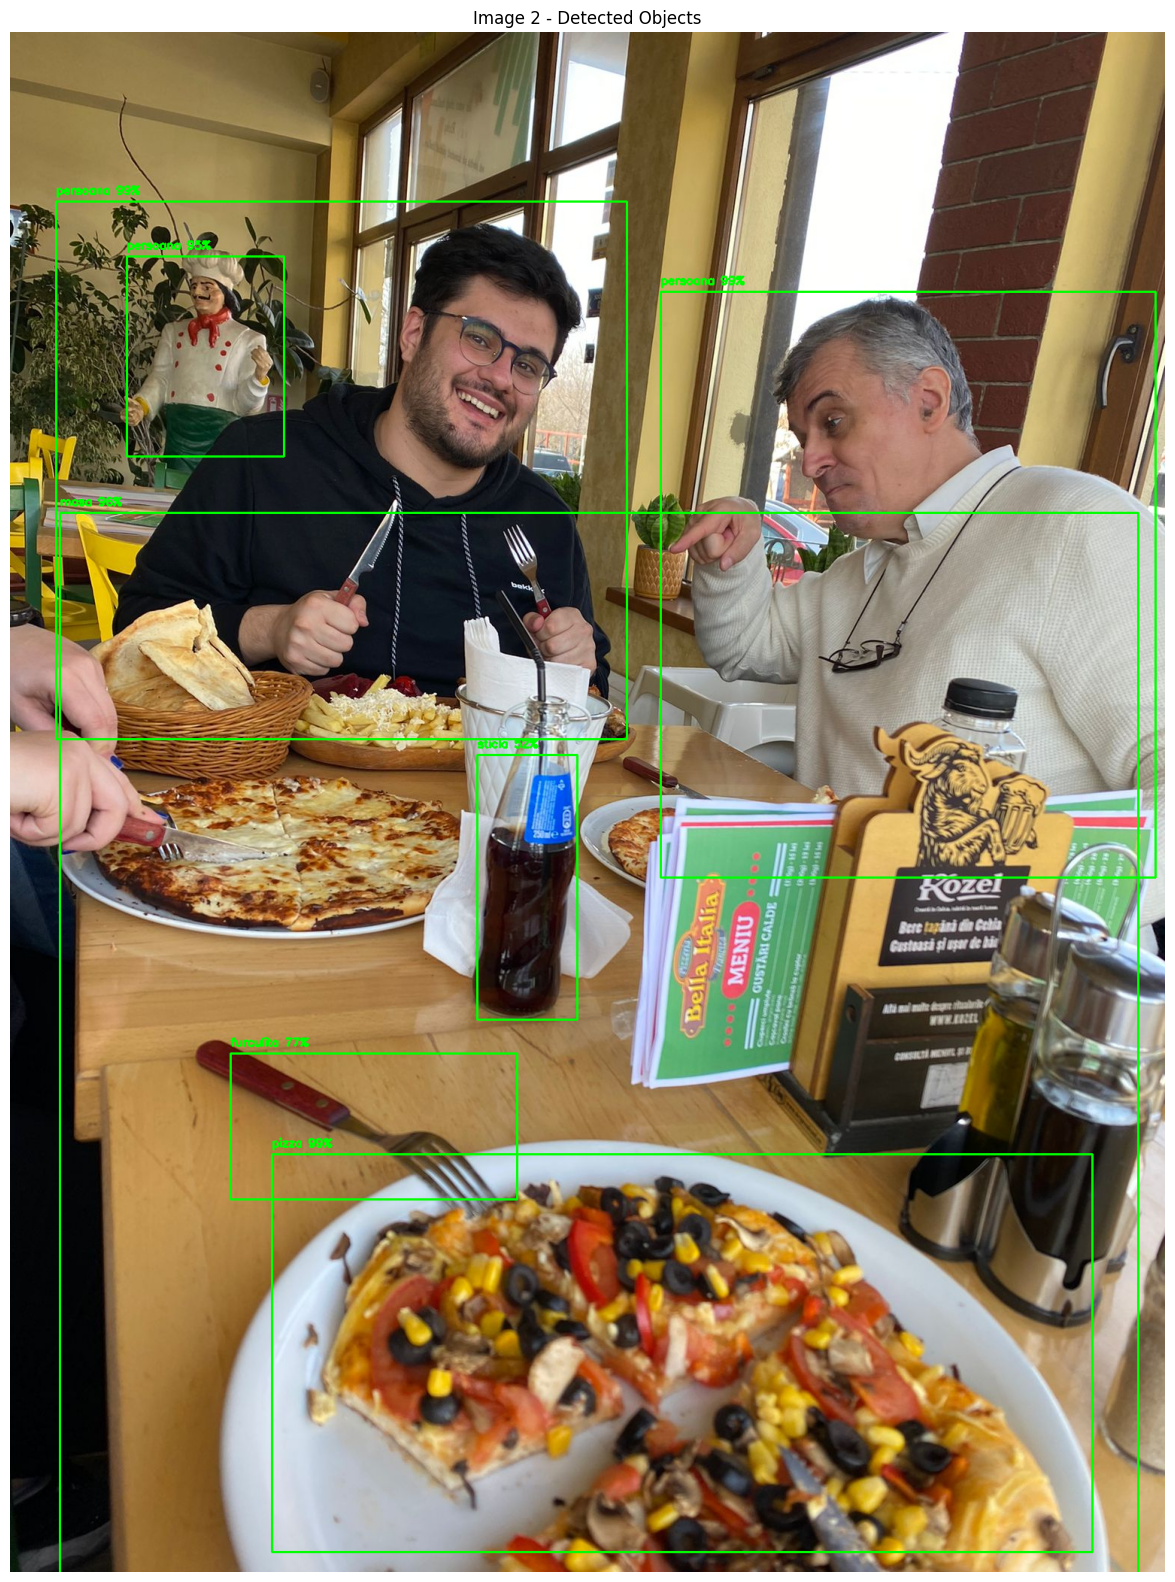

In [21]:
# detect and plot the images
results = [detect_objects(image_path) for image_path in image_paths]

for i, result in enumerate(results):
    plt.figure(figsize=(20, 20))
    plt.imshow(result)
    plt.title(f"Image {i+1} - Detected Objects")
    plt.axis("off")
    plt.show()